In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
state = 'AL'

In [ ]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [ ]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [8]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

In [9]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [10]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [11]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [12]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']

In [13]:
selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [14]:
symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]

In [15]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [16]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [17]:
Predictors = symptoms_df.to_numpy()
X_test = symptoms_df_test.to_numpy()
X_train = Predictors
predictand = noun_sentence_state_train.category_predictand.values
y_train = predictand
y_test = noun_sentence_state_test.category_predictand.values

In [18]:
from catboost import CatBoostClassifier

#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10) #0.43085421187610967
#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10, learning_rate=0.001) #0.4107318997829947
#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10, bootstrap_type = 'Bernoulli') #0.450635771803655
#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10, bootstrap_type = 'MVS') #0.42391362829319035
model = CatBoostClassifier(max_depth = 9, verbose=0, n_estimators=10, bootstrap_type = 'No') #0.45045642855861834
#model = CatBoostClassifier(max_depth = 10, verbose=0,
#                           n_estimators=10, bootstrap_type = 'Bernoulli', auto_class_weights = 'SqrtBalanced') #langevin

In [19]:
print(model.get_params(deep=True))

{'n_estimators': 10, 'max_depth': 9, 'bootstrap_type': 'No', 'verbose': 0}


In [20]:
model.fit(X_train, y_train)

In [21]:
predictions_train = model.predict(X_train)
predictions_train_prob = model.predict_proba(X_train)


In [22]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[27125 28490]
 [15802 54265]]


In [23]:
accuracy_score(y_train, predictions_train)

0.6475867666014227

In [ ]:
predictions_test = model.predict(X_test)
predictions_test_prob = model.predict_proba(X_test)

In [ ]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

In [ ]:
accuracy_score(y_test, predictions_test)

In [ ]:
print(model.get_params(deep=True))

## Regressor

In [24]:
y_train_regressor = noun_sentence_state_train.avmerror.values

In [38]:
from catboost import CatBoostRegressor

#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10) #0.43085421187610967
#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10, learning_rate=0.001) #0.4107318997829947
model_regressor = CatBoostRegressor(max_depth = 10, verbose=0, n_estimators=10, bootstrap_type = 'Bernoulli') #0.450635771803655
#model = CatBoostClassifier(max_depth = 10, verbose=0, n_estimators=10, bootstrap_type = 'MVS') #0.42391362829319035

#model_regressor = CatBoostRegressor(max_depth = 9, verbose=0, n_estimators=10, bootstrap_type = 'No') #0.45045642855861834

#model = CatBoostClassifier(max_depth = 10, verbose=0,
#                           n_estimators=10, bootstrap_type = 'Bernoulli', auto_class_weights = 'SqrtBalanced') #langevin

In [39]:
model_regressor.fit(X_train, y_train_regressor)

In [40]:
predictions_train_Regressor = model_regressor.predict(X_train)

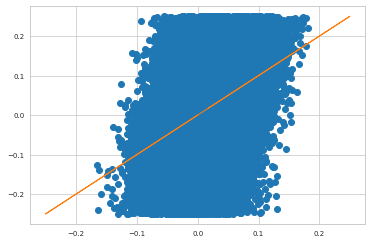

In [41]:
plt.plot(predictions_train_Regressor, y_train_regressor, 'o')
plt.plot(y_train_regressor, y_train_regressor)

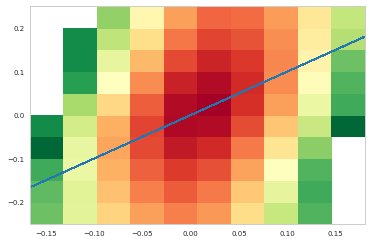

In [42]:
from matplotlib import colors
plt.hist2d(predictions_train_Regressor, y_train_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_train_regressor,y_train_regressor)

In [43]:
predictions_test_Regressor = model_regressor.predict(X_test)

In [44]:
y_test_regressor = noun_sentence_state_test.avmerror.values

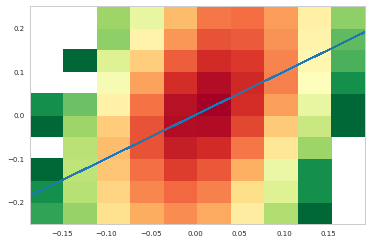

In [45]:
plt.hist2d(predictions_test_Regressor, y_test_regressor, bins=10, cmap = "RdYlGn_r",
           norm = colors.LogNorm())
plt.plot(y_test_regressor,y_test_regressor)

In [46]:
avmValue_test = noun_sentence_state_test['avmValue']
avmValue_train = noun_sentence_state_train['avmValue']

transprice_test = noun_sentence_state_test['Transprice']
transprice_train = noun_sentence_state_train['Transprice']

predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)

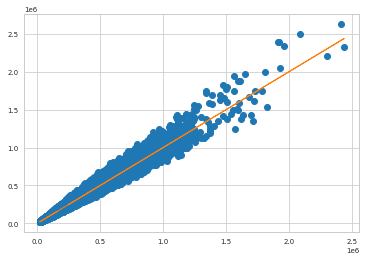

In [47]:


print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     transprice_test,'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)


In [48]:
print('') 
print('Testing')
print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
          (transprice_test)))
print(np.mean(np.abs(transprice_test - avmValue_test)/\
              (transprice_test)))

print('') 
print('Training') 
print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
          (transprice_train)))
print(np.mean(np.abs(transprice_train - avmValue_train)/\
              (transprice_train)))  


Testing
0.07653340342144421
0.08478161680856702

Training
0.07704508649496554
0.08446467748384286
